<a href="https://colab.research.google.com/github/Madhu-271005/Launched-Global-Projects/blob/main/Netflix_User_Data_base(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [ ]:
df = pd.read_csv("/content/netflix_users.csv.csv")

In [ ]:
print("Shape of dataset:", df.shape)

Shape of dataset: (25000, 7)


In [ ]:
df.head(5)

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre
0,1,James Martinez,18.0,France,Premium,80.26,Drama
1,2,John Miller,23.0,USA,Premium,321.75,Sci-Fi
2,3,Emma Davis,60.0,UK,Basic,35.89,Comedy
3,4,Emma Miller,44.0,USA,Premium,261.56,Documentary
4,5,Jane Smith,68.0,USA,Standard,909.30,Drama


In [ ]:
df.columns

Index(['User_ID', 'Name', 'Age', 'Country', 'Subscription_Type',
       'Watch_Time_Hours', 'Favorite_Genre'],
      dtype='object')

In [ ]:
df.dtypes

,0
User_ID,int64
Name,object
Age,float64
Country,object
Subscription_Type,object
Watch_Time_Hours,float64
Favorite_Genre,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               24990 non-null  object 
 2   Age                24989 non-null  float64
 3   Country            24991 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   24998 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

,0
User_ID,0
Name,10
Age,11
Country,9
Subscription_Type,0
Watch_Time_Hours,2
Favorite_Genre,0


In [ ]:
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
24995    False
24996    False
24997    False
24998    False
24999    False
Length: 25000, dtype: bool>

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

/tmp/ipython-input-3198761806.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna(df['Country'].mode()[0], inplace=True)


In [ ]:
df['Watch_Time_Hours'].fillna(df['Watch_Time_Hours'].median(), inplace=True)

/tmp/ipython-input-1216065292.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Watch_Time_Hours'].fillna(df['Watch_Time_Hours'].median(), inplace=True)


In [ ]:
df['Name'].fillna("Unknown", inplace=True)

/tmp/ipython-input-1804517316.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Name'].fillna("Unknown", inplace=True)


In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_limit, lower_limit,
                       np.where(df[col] > upper_limit, upper_limit, df[col]))


In [ ]:
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

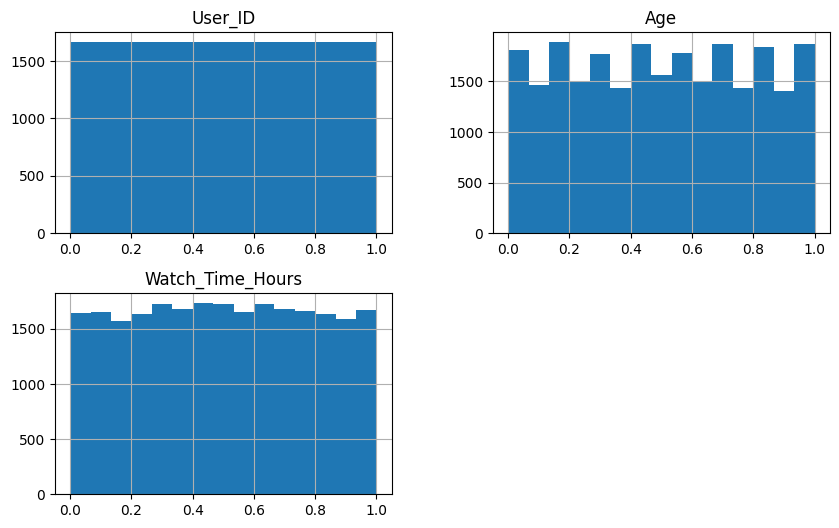

In [ ]:
df[numeric_cols].hist(bins=15, figsize=(10,6))
plt.show()

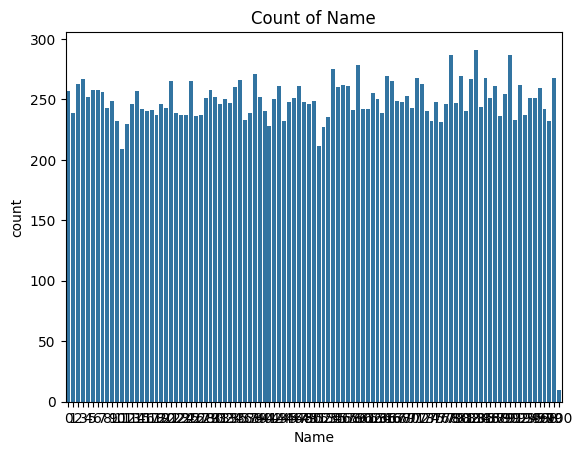

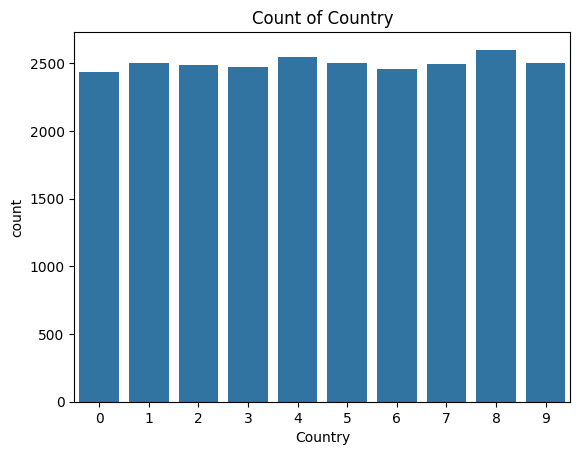

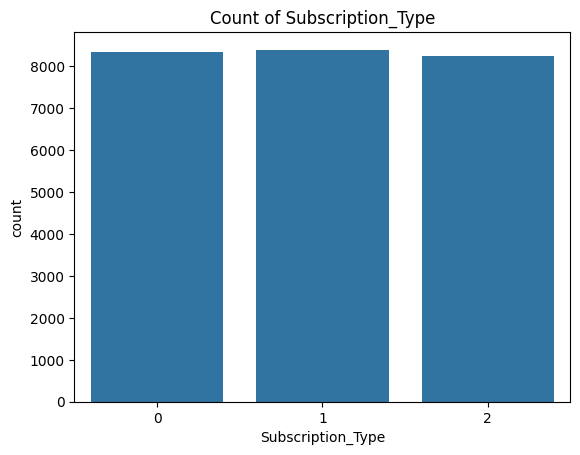

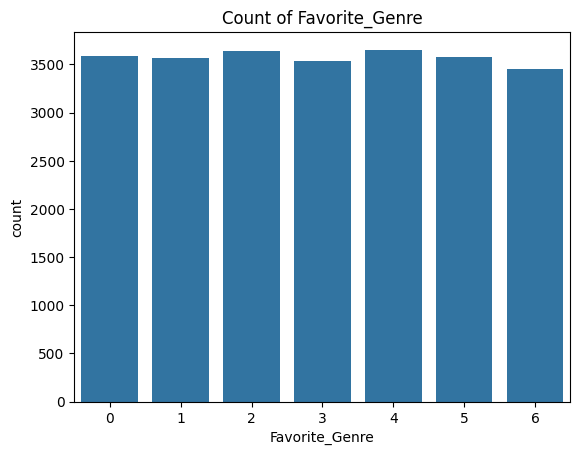

In [ ]:
for col in cat_cols:
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.show()

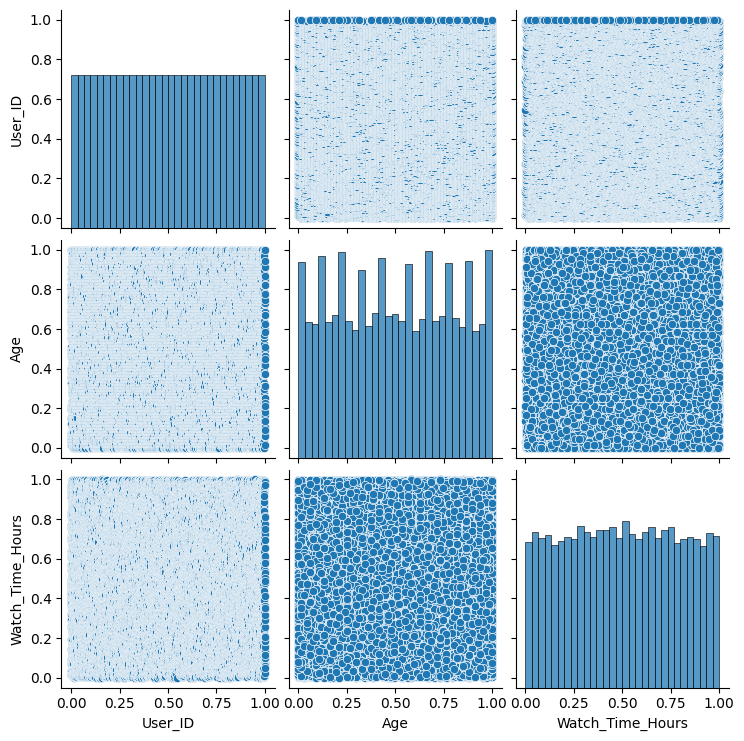

In [ ]:
sns.pairplot(df[numeric_cols])
plt.show()

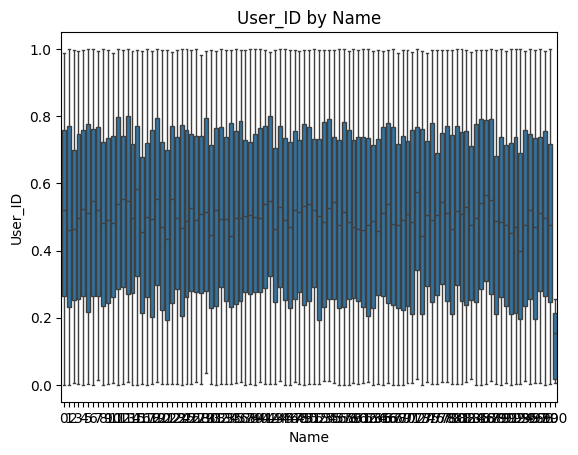

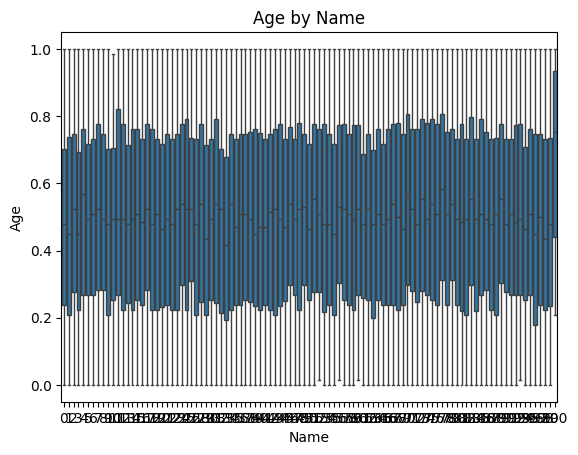

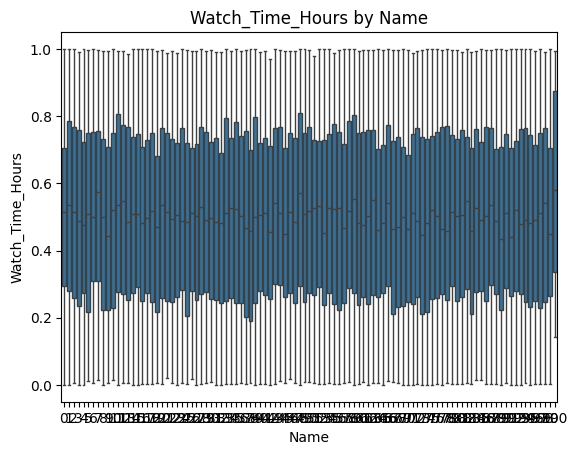

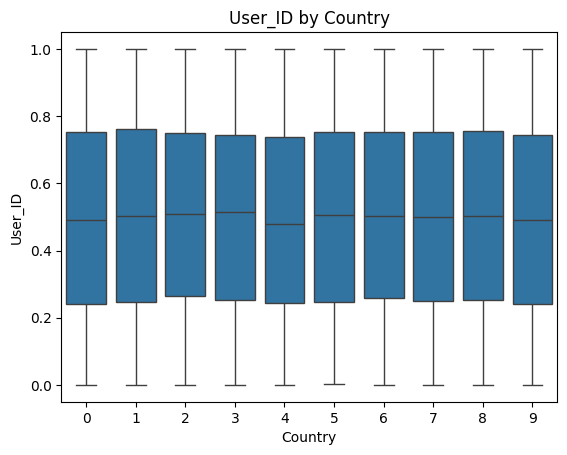

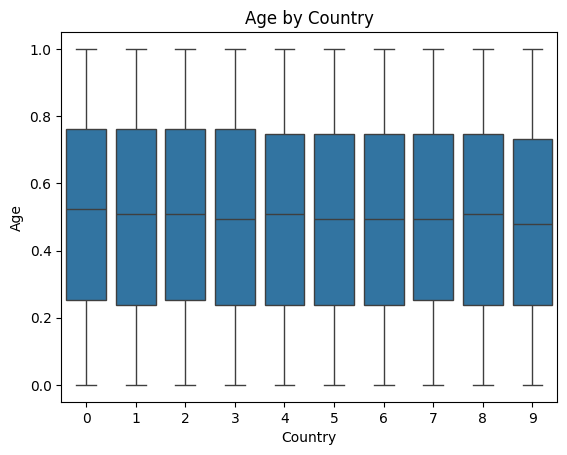

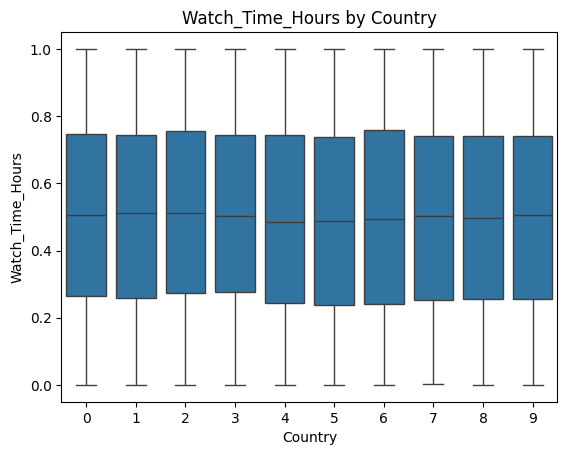

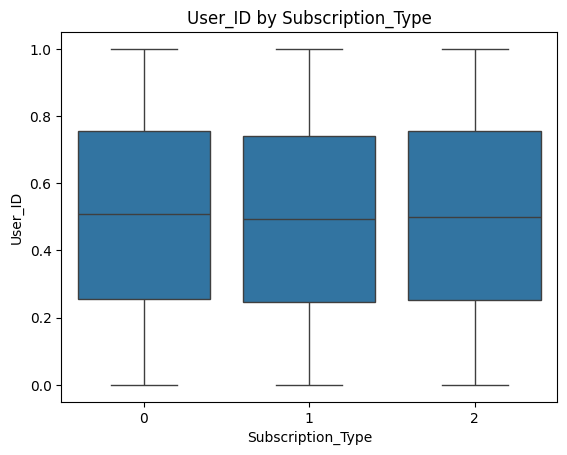

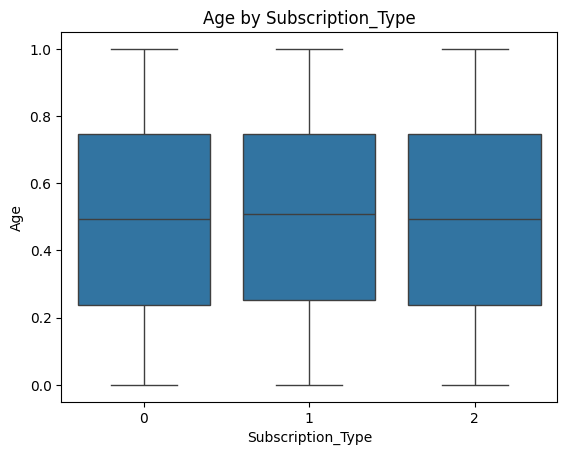

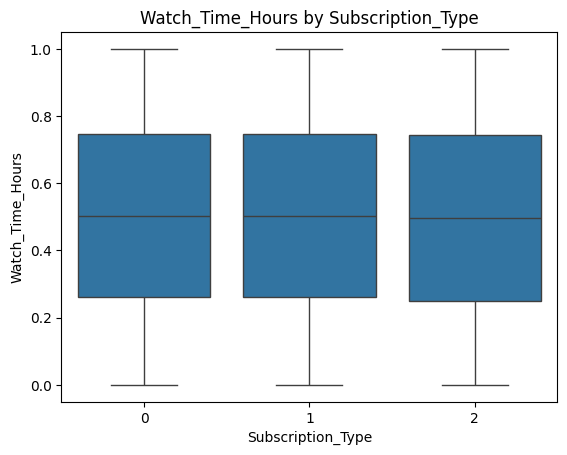

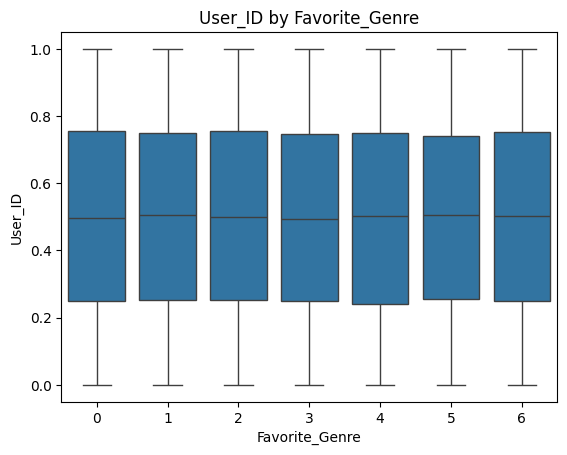

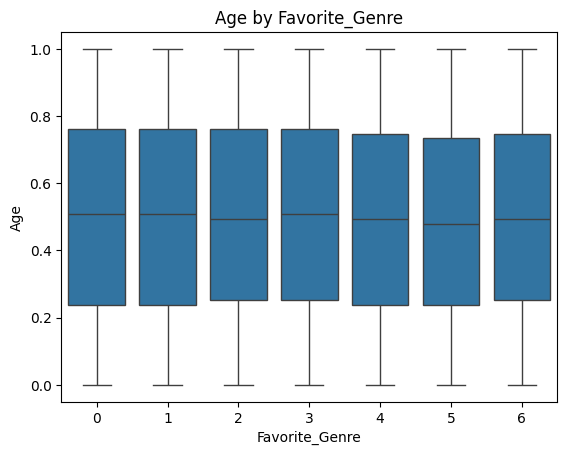

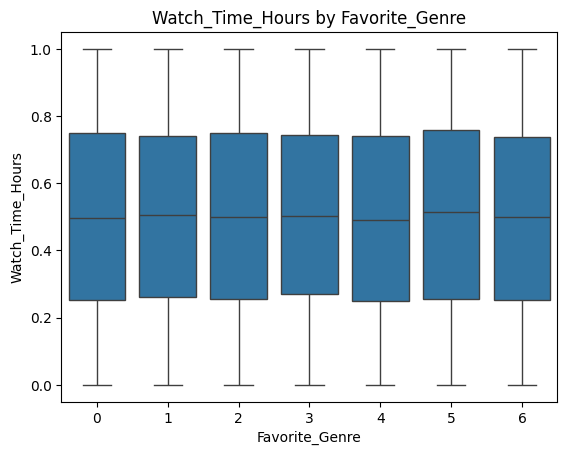

In [ ]:
for col in cat_cols:
    for num in numeric_cols:
        sns.boxplot(x=df[col], y=df[num])
        plt.title(f"{num} by {col}")
        plt.show()